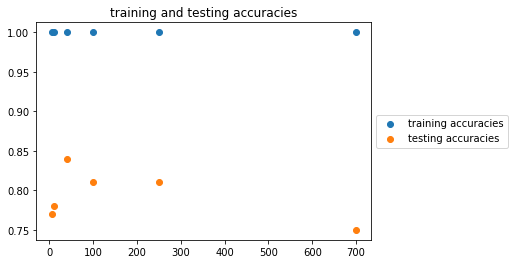

In [2]:
"""Using sklearn, apply a stratified 70-30 training-testing split with a fixed seed
(random_state=1), and assess in a single plot the training and testing accuracies of a decision tree
with no depth limits (and remaining default behavior) for a varying number of selected features
in {5,10,40,100,250,700}. Feature selection should be performed before decision tree learning
considering the discriminative power of the input variables according to mutual information
criterion (mutual_info_classif)."""

import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn import tree, metrics

data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

num = [5, 10, 40, 100, 250, 700]

df.dropna(inplace=True)

ig = {}
columns = df.columns[0:-1]

for c in columns:
    ig[c] = round(mutual_info_classif(df[c].to_numpy().reshape(-1, 1), df['class'], random_state=1)[0], 3)
sorted_igs = sorted(ig, key=ig.get, reverse=True)

selection = []
for n in num:
    selection += [sorted_igs[0:n]]

y = df['class']
test_accuracies = []
train_accuracies = []

for features in selection:
    x = df[features]
    X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)
    
    predictor = tree.DecisionTreeClassifier(max_depth=None, random_state=1)
    predictor.fit(X_train, y_train)
    
    y_pred = predictor.predict(X_test)
    test_accuracies += [round(metrics.accuracy_score(y_test, y_pred),2)]
    y_pred = predictor.predict(X_train)
    train_accuracies += [round(metrics.accuracy_score(y_train, y_pred),2)]

plt.title("training and testing accuracies")
plt.scatter(num, train_accuracies, label='training accuracies')
plt.scatter(num, test_accuracies, label='testing accuracies')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()